# Financial Behavior Analysis

## Exploratory Data Analysis(ُEDA)

**Importing  libraries**

In [ ]:
%pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from ydata_profiling import ProfileReport
from scipy import stats

**Load & Explore Data**

In [5]:
df = pd.read_csv('financial_behavior_dataset.csv')
df.head()

,Customer_ID,Month,Age,Gender,Income,Total_Spending,Essential_Spending,Non_Essential_Spending,Savings_Amount,Investments_Amount,Debt_Payments,Account_Balance
0,CUST1001,2024-01,23,Male,11337,10696.36,5500.00,1728.96,566.85,1700.55,1200.0,640.64
1,CUST1001,2024-02,23,Male,11337,10357.91,5900.00,990.51,566.85,1700.55,1200.0,979.09
2,CUST1001,2024-03,23,Male,11337,9593.21,5198.11,927.70,566.85,1700.55,1200.0,1743.79
3,CUST1001,2024-04,23,Male,11337,10932.08,5964.68,1500.00,566.85,1700.55,1200.0,404.92
4,CUST1001,2024-05,23,Male,11337,11251.97,5884.57,1900.00,566.85,1700.55,1200.0,85.03


In [8]:
df.shape

(600, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             600 non-null    object 
 1   Month                   600 non-null    object 
 2   Age                     600 non-null    int64  
 3   Gender                  600 non-null    object 
 4   Income                  600 non-null    int64  
 5   Total_Spending          600 non-null    float64
 6   Essential_Spending      600 non-null    float64
 7   Non_Essential_Spending  600 non-null    float64
 8   Savings_Amount          596 non-null    float64
 9   Investments_Amount      600 non-null    float64
 10  Debt_Payments           600 non-null    float64
 11  Account_Balance         600 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 56.4+ KB


**Clean Data**

In [21]:
# Convert Month to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%m-%Y", errors="coerce").dt.month

In [107]:
#Data Type Check
print(df.dtypes)

Customer_ID                object
Month                       int32
Age                         int64
Gender                     object
Income                      int64
Total_Spending            float64
Essential_Spending        float64
Non_Essential_Spending    float64
Savings_Amount            float64
Investments_Amount        float64
Debt_Payments             float64
Account_Balance           float64
Savings_Rate              float64
Investment_Rate           float64
Debt_Ratio                float64
Spending_Rate             float64
Spending_Volatility       float64
dtype: object


In [9]:
df.isnull().sum()

,0
Customer_ID,0
Month,0
Age,0
Gender,0
Income,0
Total_Spending,0
Essential_Spending,0
Non_Essential_Spending,0
Savings_Amount,4
Investments_Amount,0


In [10]:
#replaces null cell with 0
df['Savings_Amount'] = df['Savings_Amount'].fillna(0)

In [12]:
df['Savings_Amount'].isnull().sum()

np.int64(0)

In [106]:
# Duplicate rows
df.duplicated().sum()

np.int64(0)

**Descriptive Statistics**

In [6]:
df.describe()

,Age,Income,Total_Spending,Essential_Spending,Non_Essential_Spending,Savings_Amount,Investments_Amount,Debt_Payments,Account_Balance
count,600.000000,600.000000,600.000000,600.000000,600.000000,596.000000,600.000000,600.000000,600.00000
mean,42.140000,16310.740000,14128.112100,6227.572500,2698.384683,1175.772047,1746.065883,2288.154667,2182.62790
std,10.591854,5965.844351,5841.683996,2308.639048,1794.914198,1935.423439,2354.777819,2904.956380,2497.26299
min,23.000000,6711.000000,3765.350000,1500.000000,371.340000,0.000000,0.000000,0.000000,-1.70000
25%,35.000000,11637.000000,9881.205000,4500.000000,1478.645000,0.000000,0.000000,0.000000,543.09500
50%,41.000000,14939.500000,13428.510000,5500.000000,2195.000000,0.000000,588.950000,1300.000000,1546.70000
75%,52.000000,21071.000000,18555.615000,7500.000000,3580.502500,1646.100000,2379.795000,2500.000000,2853.77500
max,59.000000,28829.000000,28790.150000,11000.000000,11600.000000,8151.300000,8648.700000,10987.000000,16884.26000


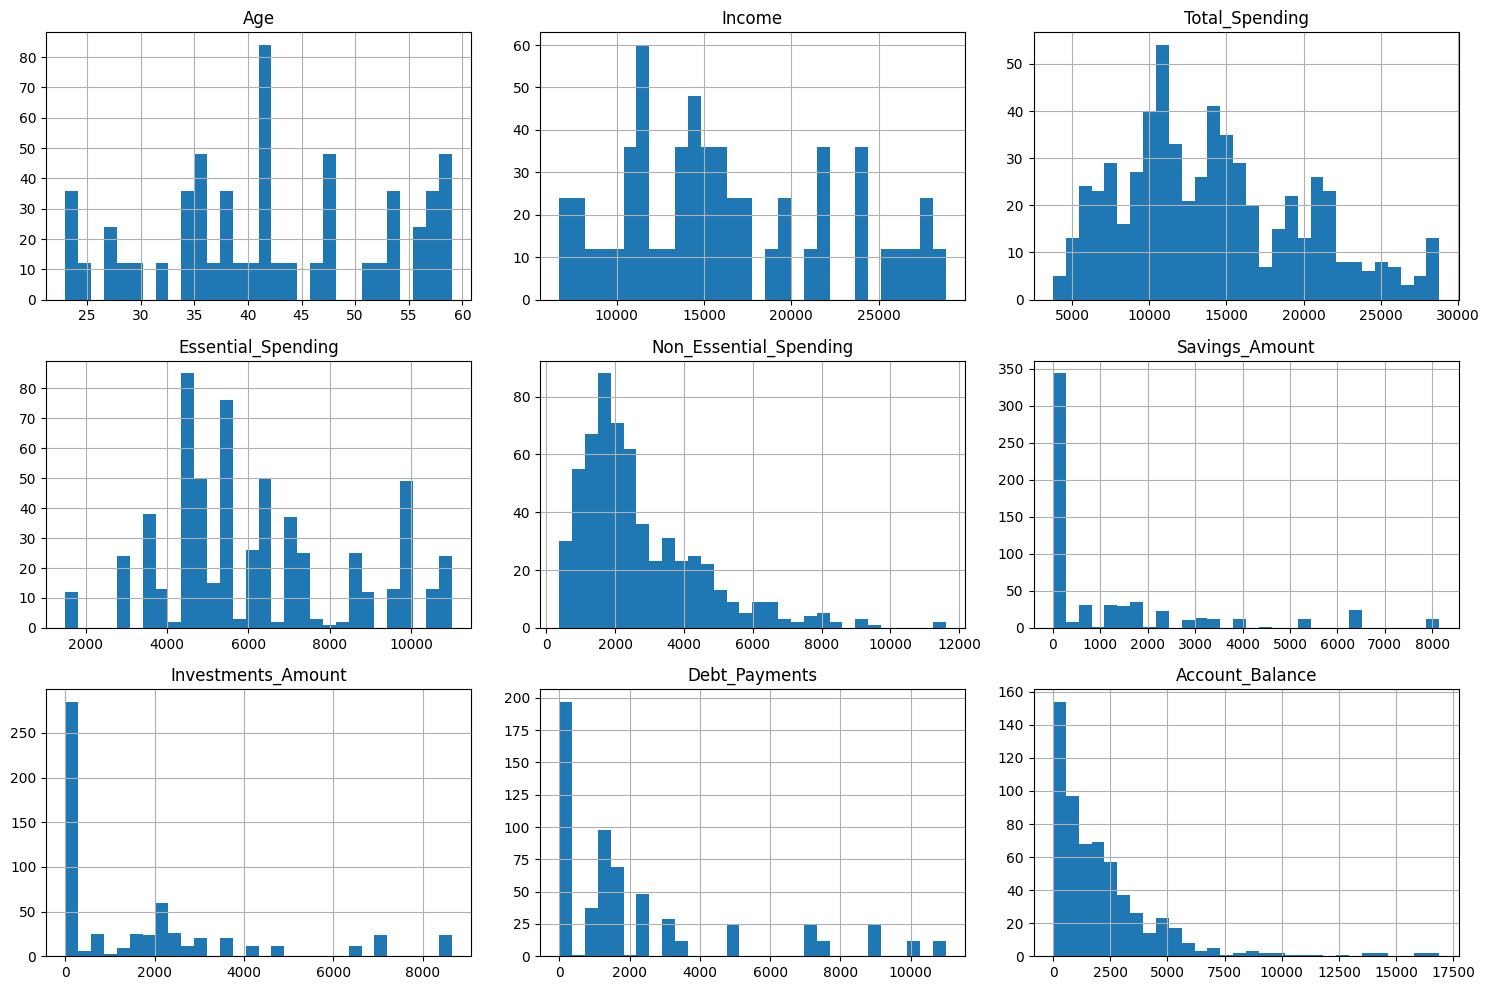

In [22]:
# Analysis of numerical variables (such as spending and saving)
num_cols = ['Age', 'Income', 'Total_Spending', 'Essential_Spending',
            'Non_Essential_Spending', 'Savings_Amount',
            'Investments_Amount', 'Debt_Payments', 'Account_Balance']

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


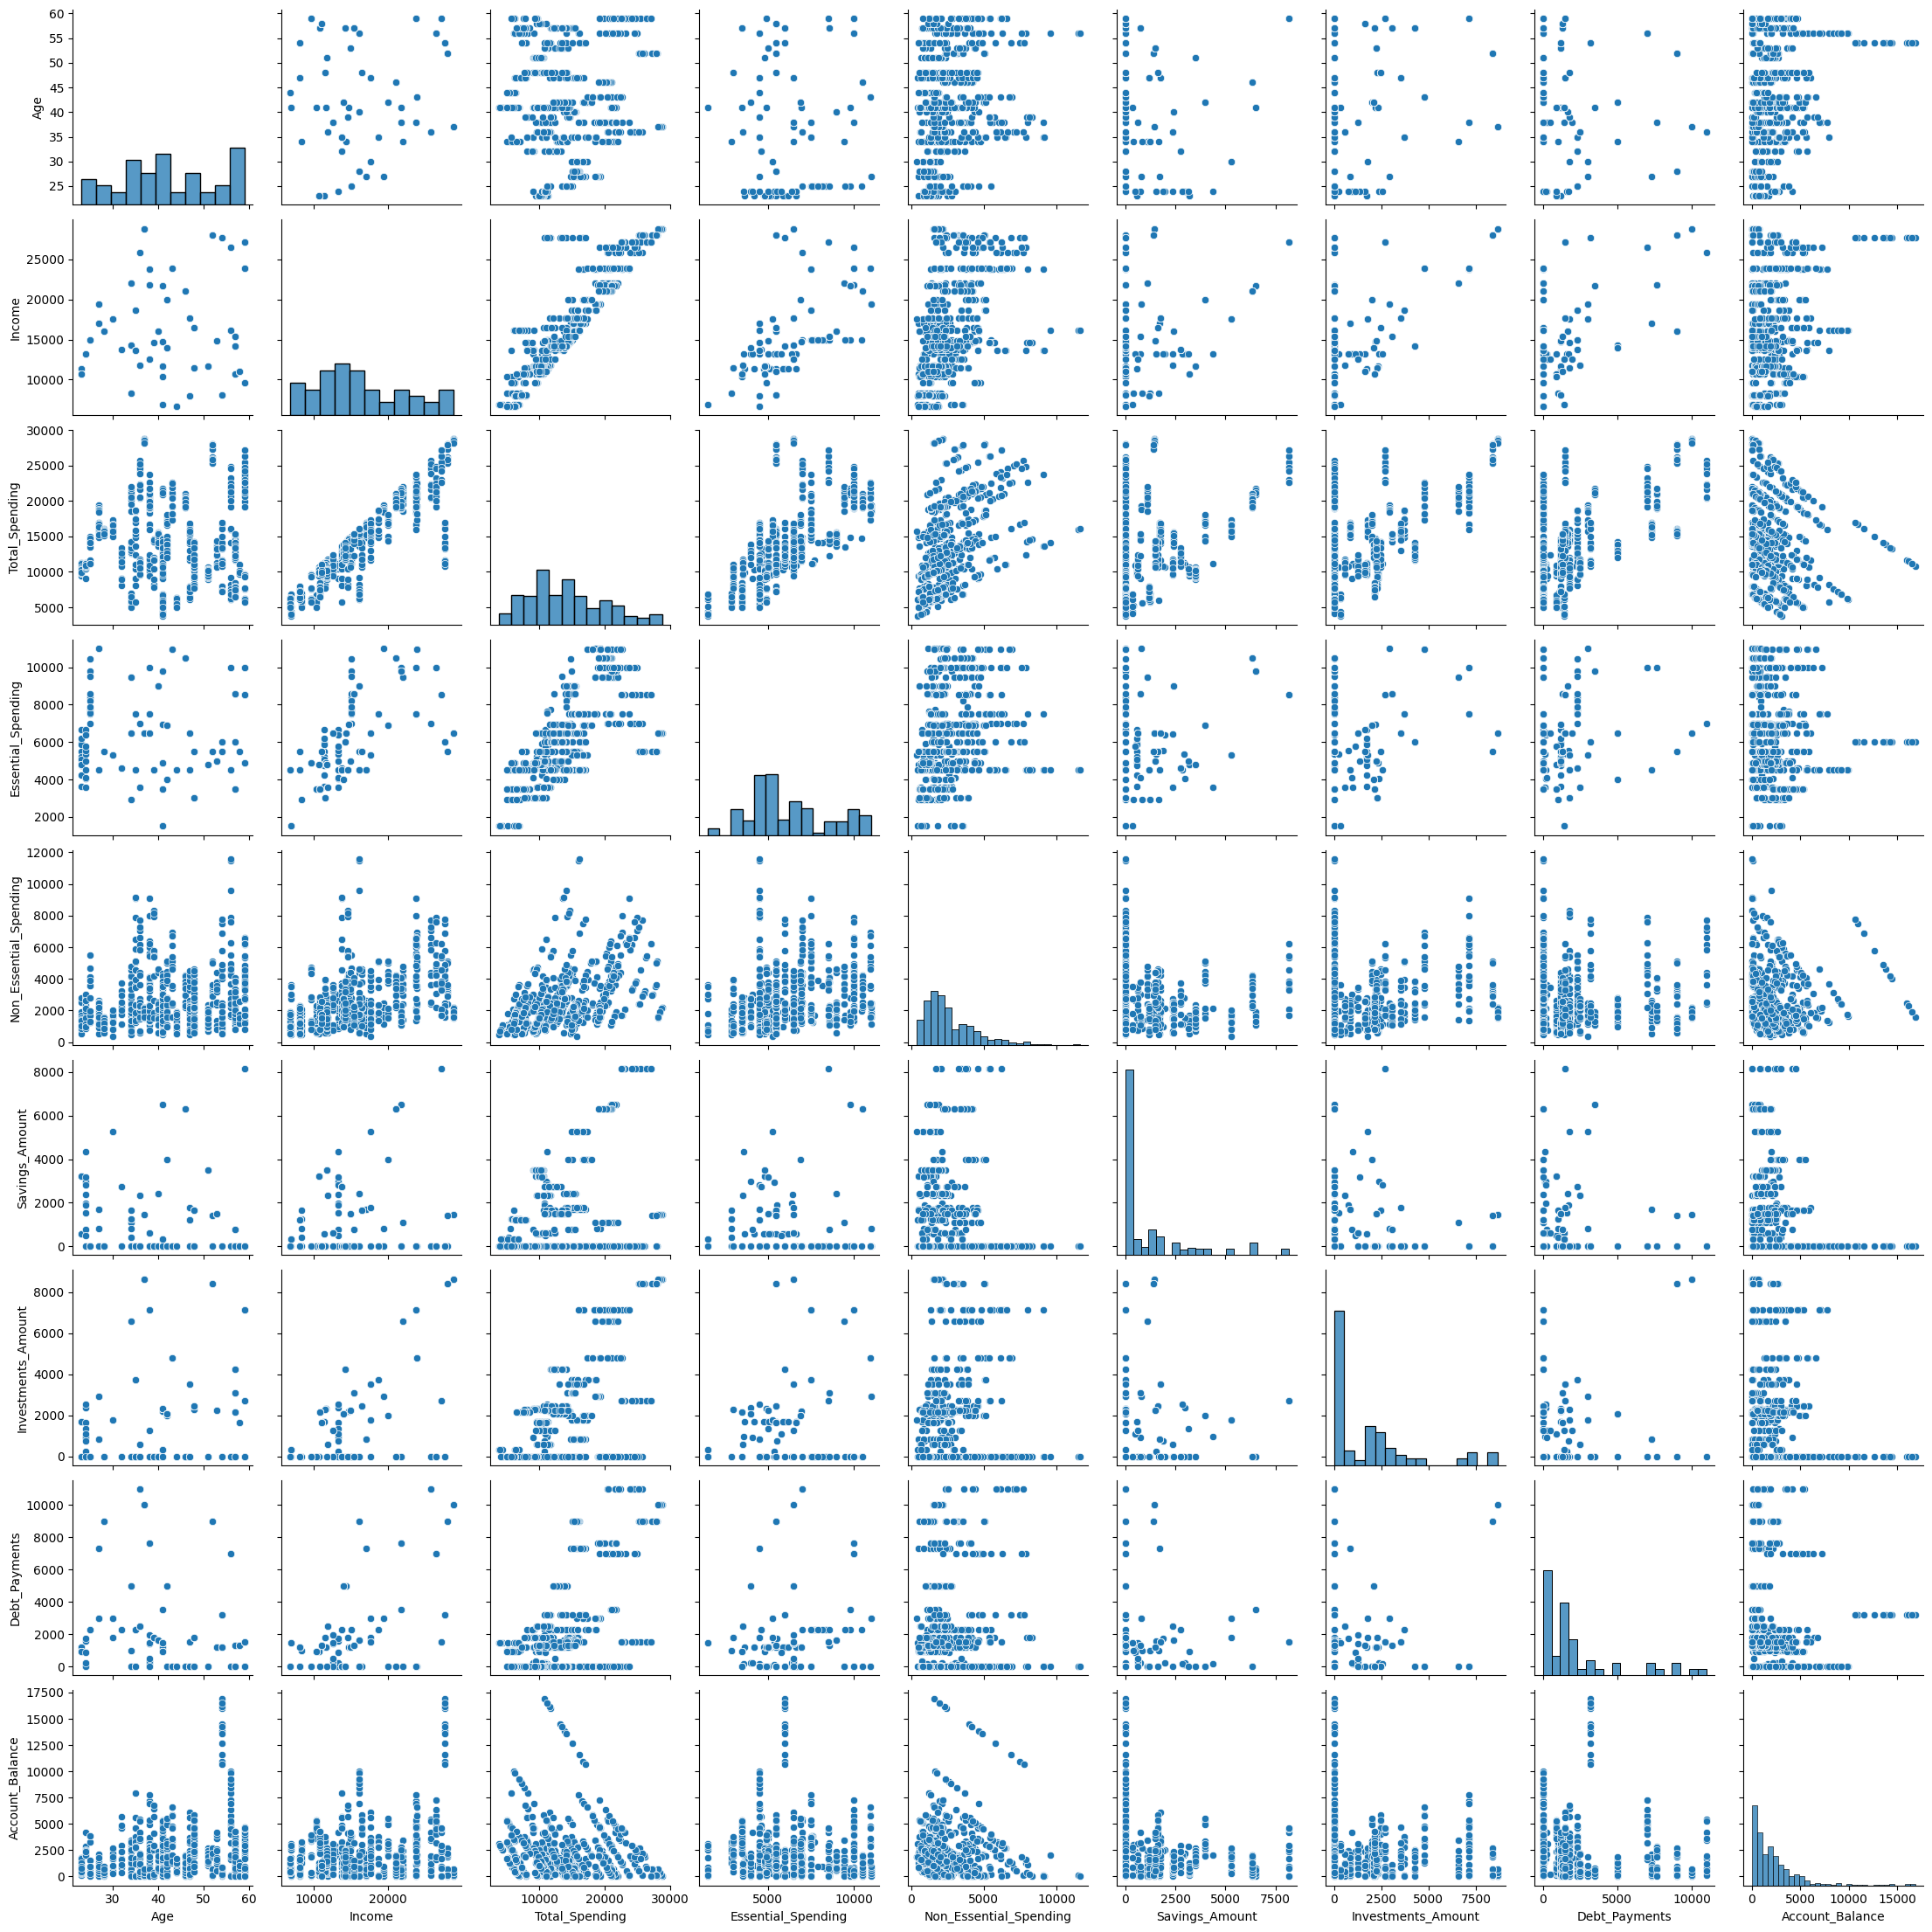

In [23]:
#Relationships between Age,income,spending, saving, and debt
sns.pairplot(df[num_cols])
plt.show()

<Axes: xlabel='Gender', ylabel='Total_Spending'>

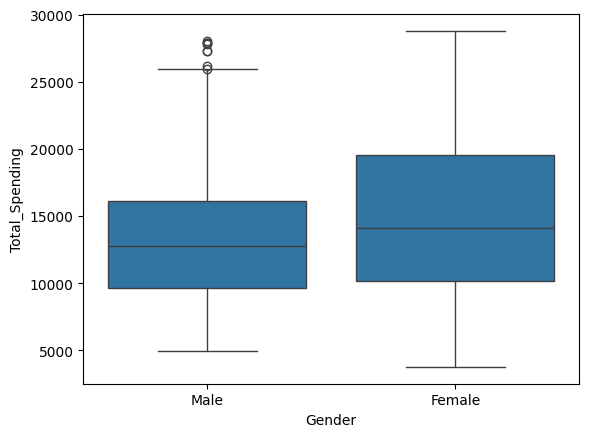

In [24]:
#Distribution by gender
sns.boxplot(x='Gender', y='Total_Spending', data=df)

<Axes: xlabel='Month', ylabel='Savings_Amount'>

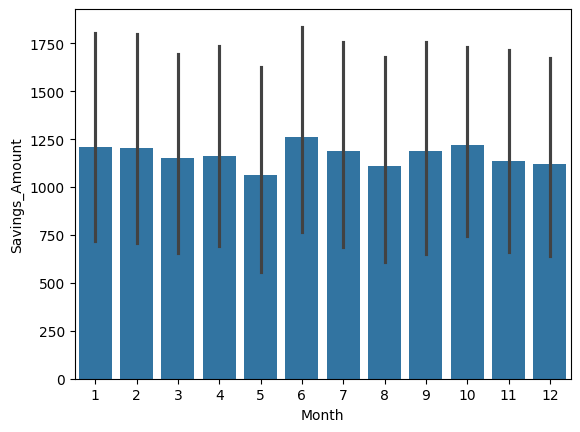

In [25]:
# Distribution by month
sns.barplot(x='Month', y='Savings_Amount', data=df)

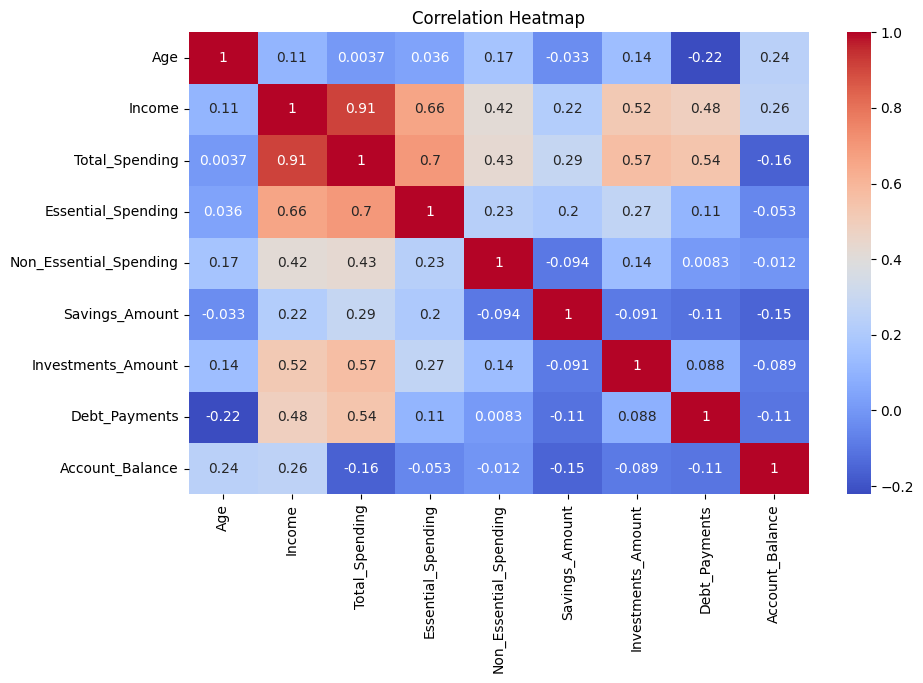

In [26]:
# Check the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Derivation of indicators**

In [36]:
#Financial Volatility Index
# If Spending_Volatility is high → the client is "seasonal" or "random"
Spending_Volatility = df.groupby("Customer_ID")["Total_Spending"].std().reset_index()
Spending_Volatility.columns = ["Customer_ID", "Spending_Volatility"]
Spending_Volatility

,Customer_ID,Spending_Volatility
0,CUST1000,1127.963236
1,CUST1001,598.619274
2,CUST1002,2371.200345
3,CUST1003,1574.507687
4,CUST1004,1242.601960
5,CUST1005,860.532848
6,CUST1006,2410.825360
7,CUST1007,1756.175787
8,CUST1008,1689.360972
9,CUST1009,1778.260666


In [31]:
# Savings Rate
df["Savings_Rate"] = df["Savings_Amount"] / df["Income"]
df["Savings_Rate"]

,Savings_Rate
0,0.05
1,0.05
2,0.05
3,0.05
4,0.05
...,...
595,0.30
596,0.30
597,0.30
598,0.30


In [32]:
# Investment Rate
df["Investment_Rate"] = df["Investments_Amount"] / df["Income"]
df["Investment_Rate"]

,Investment_Rate
0,0.15
1,0.15
2,0.15
3,0.15
4,0.15
...,...
595,0.10
596,0.10
597,0.10
598,0.10


In [33]:
# Debt to Income Ratio
df["Debt_Ratio"] = df["Debt_Payments"] / df["Income"]
df["Debt_Ratio"]

,Debt_Ratio
0,0.105848
1,0.105848
2,0.105848
3,0.105848
4,0.105848
...,...
595,0.055206
596,0.055206
597,0.055206
598,0.055206


In [34]:
# Total Spending Rate
df["Spending_Rate"] = df["Total_Spending"] / df["Income"]
df["Spending_Rate"]

,Spending_Rate
0,0.943491
1,0.913638
2,0.846186
3,0.964283
4,0.992500
...,...
595,0.937963
596,0.907838
597,0.970682
598,0.998064


In [89]:
# Merge the Spending_Volatility DataFrame with the main DataFrame only if Spending_Volatility column doesn't exist
if "Spending_Volatility" not in df.columns:
  df = pd.merge(df, Spending_Volatility, on="Customer_ID", how="left")

# Calculate initial customer metrics
customer_metrics = df.groupby("Customer_ID")[["Savings_Rate", "Investment_Rate", "Debt_Ratio", "Spending_Volatility", "Spending_Rate", "Total_Spending"]].mean().reset_index()
display(customer_metrics)

,Customer_ID,Savings_Rate,Investment_Rate,Debt_Ratio,Spending_Volatility,Spending_Rate,Total_Spending
0,CUST1000,0.000000,0.150000,0.081627,1127.963236,0.885581,13018.931667
1,CUST1001,0.050000,0.150000,0.105848,598.619274,0.921293,10444.695833
2,CUST1002,0.000000,0.000000,0.000000,2371.200345,0.749652,10252.994167
3,CUST1003,0.000000,0.200000,0.123179,1574.507687,0.897389,16756.049167
4,CUST1004,0.000000,0.200000,0.156767,1242.601960,0.802353,9212.619167
5,CUST1005,0.000000,0.200000,0.103119,860.532848,0.871997,10147.425833
6,CUST1006,0.000000,0.300000,0.000000,2410.825360,0.827022,19628.550833
7,CUST1007,0.000000,0.200000,0.000000,1756.175787,0.842499,20160.155833
8,CUST1008,0.075000,0.133333,0.084938,1689.360972,0.826367,14593.646667
9,CUST1009,0.133333,0.000000,0.167565,1778.260666,0.800001,10980.808333


**Financial Behavior Type and Financial Goal Type**

In [110]:

def classify_behavior(row):
    if row["Savings_Rate"] > 0.1 and row["Investment_Rate"] > 0.1:
        return "disciplined"
    elif row["Spending_Volatility"] > 2000:
        return "volatile"
    elif row["Savings_Rate"] < 0.05 and row["Investment_Rate"] < 0.05:
        return "spender"
    else:
        return "unclassified"
customer_metrics["Behavior_Type"] = customer_metrics.apply(classify_behavior, axis=1)


In [111]:
def classify_goal(row):
    if row["Savings_Rate"] > 0.10 and row["Investment_Rate"] < 0.05:
        return "Saver"
    elif row["Investment_Rate"] > 0.1:
        return "Investor"
    else:
        return "Spender"
customer_metrics["Financial_Goal"] = customer_metrics.apply(classify_goal, axis=1)

In [112]:
display(customer_metrics)

,Customer_ID,Savings_Rate,Investment_Rate,Debt_Ratio,Spending_Volatility,Spending_Rate,Total_Spending,Behavior_Type,Financial_Goal
0,CUST1000,0.000000,0.150000,0.081627,1127.963236,0.885581,13018.931667,unclassified,Investor
1,CUST1001,0.050000,0.150000,0.105848,598.619274,0.921293,10444.695833,unclassified,Investor
2,CUST1002,0.000000,0.000000,0.000000,2371.200345,0.749652,10252.994167,volatile,Spender
3,CUST1003,0.000000,0.200000,0.123179,1574.507687,0.897389,16756.049167,unclassified,Investor
4,CUST1004,0.000000,0.200000,0.156767,1242.601960,0.802353,9212.619167,unclassified,Investor
5,CUST1005,0.000000,0.200000,0.103119,860.532848,0.871997,10147.425833,unclassified,Investor
6,CUST1006,0.000000,0.300000,0.000000,2410.825360,0.827022,19628.550833,volatile,Investor
7,CUST1007,0.000000,0.200000,0.000000,1756.175787,0.842499,20160.155833,unclassified,Investor
8,CUST1008,0.075000,0.133333,0.084938,1689.360972,0.826367,14593.646667,unclassified,Investor
9,CUST1009,0.133333,0.000000,0.167565,1778.260666,0.800001,10980.808333,unclassified,Saver


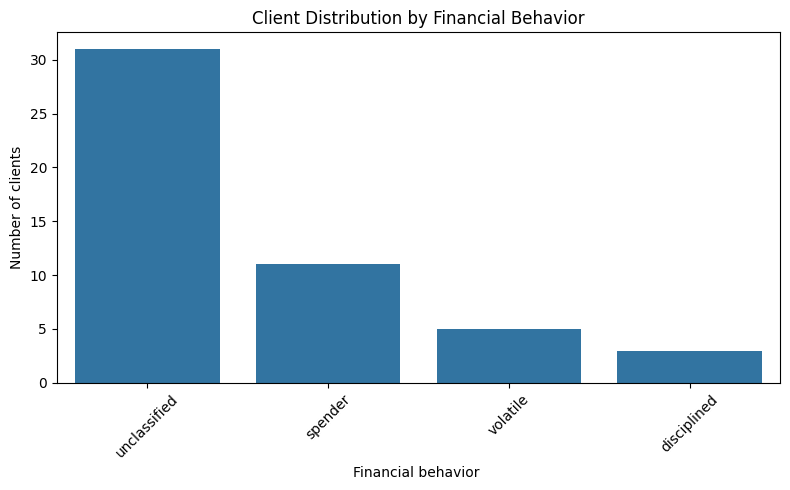

In [113]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Behavior_Type', data=customer_metrics, order=customer_metrics["Behavior_Type"].value_counts().index)
plt.title("Client Distribution by Financial Behavior")
plt.xlabel("Financial behavior ")
plt.ylabel("Number of clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

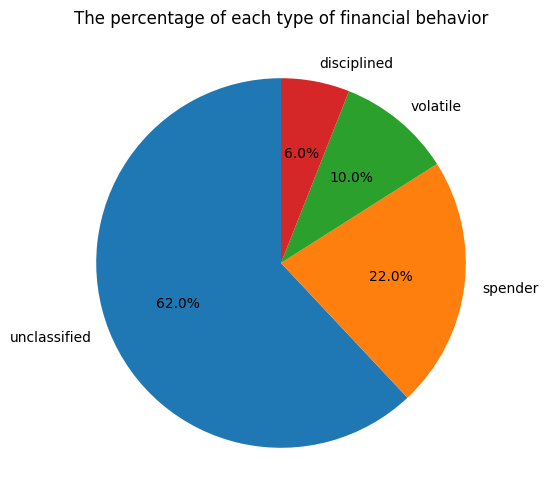

In [114]:
plt.figure(figsize=(6, 6))
customer_metrics["Behavior_Type"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("The percentage of each type of financial behavior")
plt.ylabel("")  # Hide sidebar
plt.show()


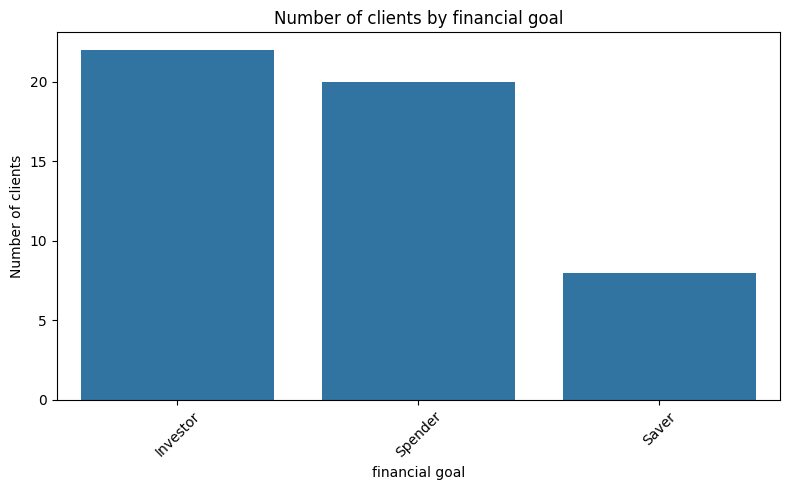

In [115]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Financial_Goal', data=customer_metrics, order=customer_metrics["Financial_Goal"].value_counts().index)
plt.title("Number of clients by financial goal")
plt.xlabel("financial goal")
plt.ylabel("Number of clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

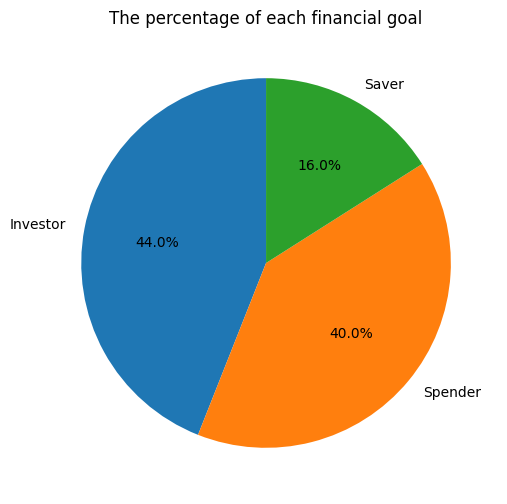

In [116]:
plt.figure(figsize=(6, 6))
customer_metrics["Financial_Goal"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("The percentage of each financial goal")
plt.ylabel("")  # Hide sidebar
plt.show()

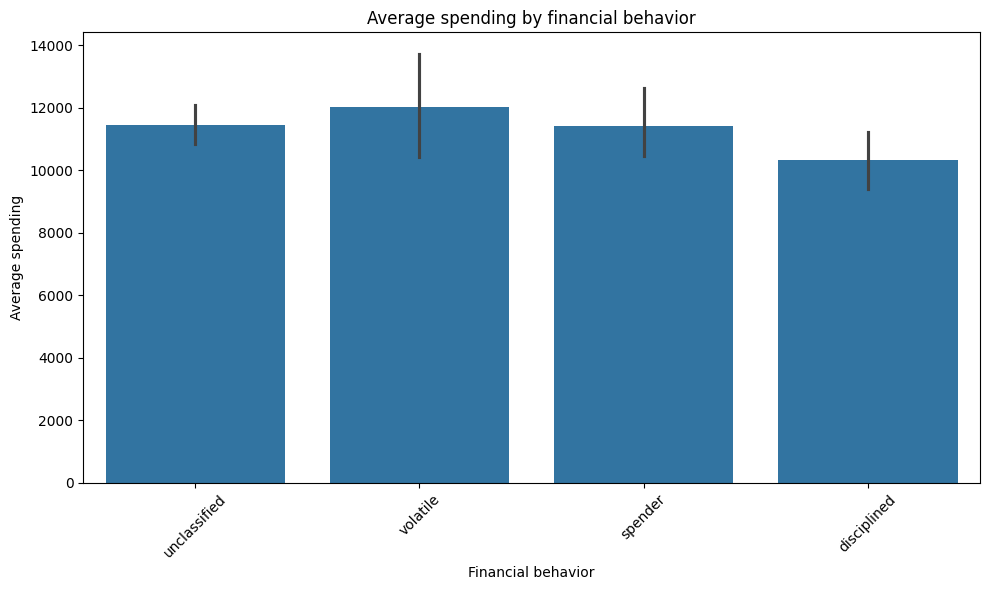

In [117]:
#Average spending by behavior
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_metrics['Behavior_Type'], y=df['Total_Spending'], data=df, estimator='mean')
plt.title("Average spending by financial behavior")
plt.xlabel("Financial behavior")
plt.ylabel("Average spending")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


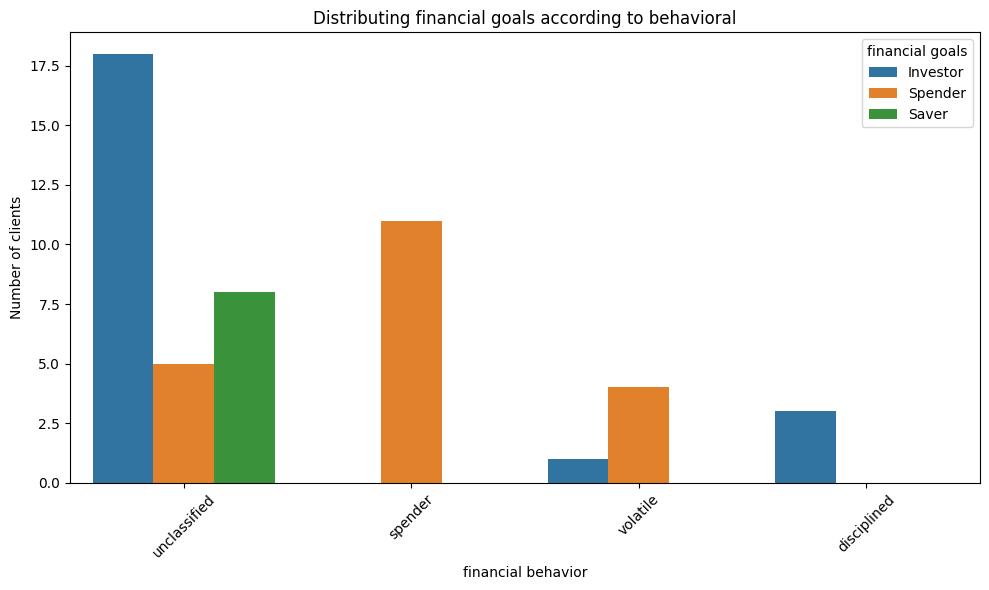

In [118]:
#Comparing behavior with financial goals
plt.figure(figsize=(10, 6))
sns.countplot(x="Behavior_Type", hue='Financial_Goal', data=customer_metrics, order=customer_metrics["Behavior_Type"].value_counts().index)
plt.title("Distributing financial goals according to behavioral")
plt.xlabel("financial behavior")
plt.ylabel("Number of clients")
plt.xticks(rotation=45)
plt.legend(title='financial goals')
plt.tight_layout()
plt.show()

In [85]:
df = df.drop(columns=['Spending_Volatility_y', 'Spending_Volatility_x'])

**Save the customer classification to csv**

In [120]:
# save the customer classification to CSV file
customer_metrics.to_csv("customer_classification_data.csv", index=False)

**Generate report**

In [105]:
# Generate a quick, comprehensive automated report
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 110.39it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0
 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0
 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1
 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2
 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3
 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4
 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5
 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6
 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7
 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 3 4 5 6 7 8 9 9 0 0 1 2 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]